<a href="https://colab.research.google.com/github/Sherma-ThangamS/Zeotap_Assignment/blob/main/Sherma_SelvaKumar_EDAipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Replace with your actual file paths if they are different
customers_url = "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
products_url = "https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0"
transactions_url = "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"


try:
  Customers = pd.read_csv(customers_url)
  Products = pd.read_csv(products_url)
  Transactions = pd.read_csv(transactions_url)

  print("Customers DataFrame:")
  print(Customers.head())

  print("\nProducts DataFrame:")
  print(Products.head())

  print("\nTransactions DataFrame:")
  print(Transactions.head())

except Exception as e:
  print(f"An error occurred: {e}")

Customers DataFrame:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products DataFrame:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions DataFrame:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00

In [2]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [3]:
Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [4]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [5]:
Customers.isnull().sum()
Products.isnull().sum()
Transactions.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

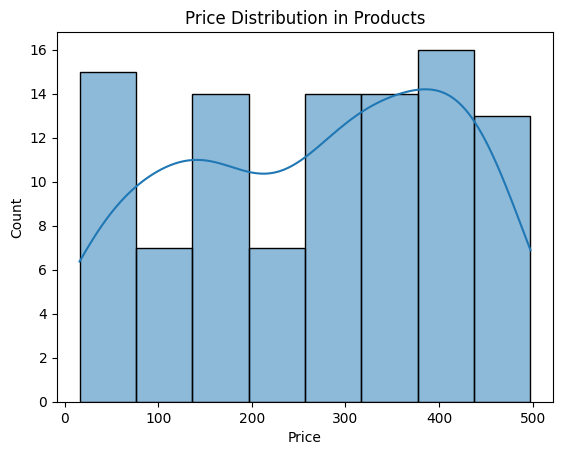

In [7]:
# Histogram for Price in Products
sns.histplot(Products['Price'], kde=True)
plt.title('Price Distribution in Products')
plt.show()

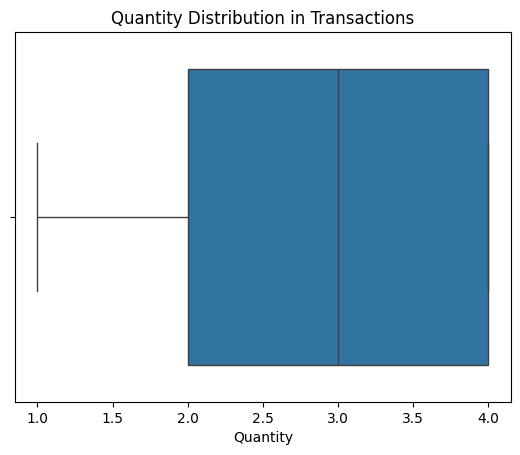

In [8]:
# Boxplot for Quantity in Transactions
sns.boxplot(x=Transactions['Quantity'])
plt.title('Quantity Distribution in Transactions')
plt.show()

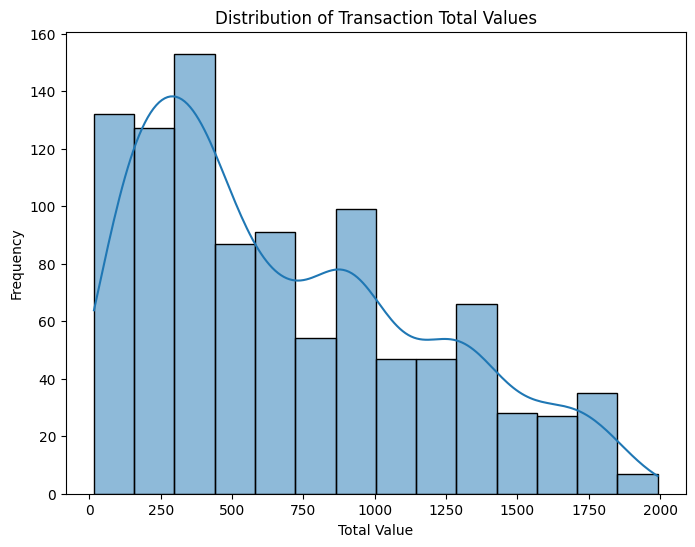

In [9]:
# TotalValue distribution in Transactions
plt.figure(figsize=(8, 6))
sns.histplot(Transactions['TotalValue'], kde=True)
plt.title('Distribution of Transaction Total Values')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()


In [10]:
# Merge the dataframes to analyze relationships
merged_data = pd.merge(Transactions, Customers, on='CustomerID')
merged_data = pd.merge(merged_data, Products, on='ProductID')

# Group by region to see the number of transactions by region
region_sales = merged_data.groupby('Region').size()
print(region_sales)

# Check how many products each customer bought
customer_purchase = merged_data.groupby('CustomerName')['Quantity'].sum()
print(customer_purchase)


Region
Asia             218
Europe           234
North America    244
South America    304
dtype: int64
CustomerName
Aaron Cox           12
Abigail Jones       32
Aimee Taylor        23
Albert Burke        18
Alexander Barker    15
                    ..
Wayne Stone         20
Wendy Browning       9
William Adams       28
William Walker       5
Zachary Turner       1
Name: Quantity, Length: 199, dtype: int64


In [11]:
# Convert SignupDate to datetime
merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])

# Total spending per customer
customer_spending = merged_data.groupby('CustomerName')['TotalValue'].sum()
print(customer_spending)


CustomerName
Aaron Cox           1717.55
Abigail Jones       5487.25
Aimee Taylor        7572.91
Albert Burke        5316.46
Alexander Barker    3347.60
                     ...   
Wayne Stone         5771.27
Wendy Browning      3716.52
William Adams       7634.45
William Walker      1284.27
Zachary Turner       396.34
Name: TotalValue, Length: 199, dtype: float64


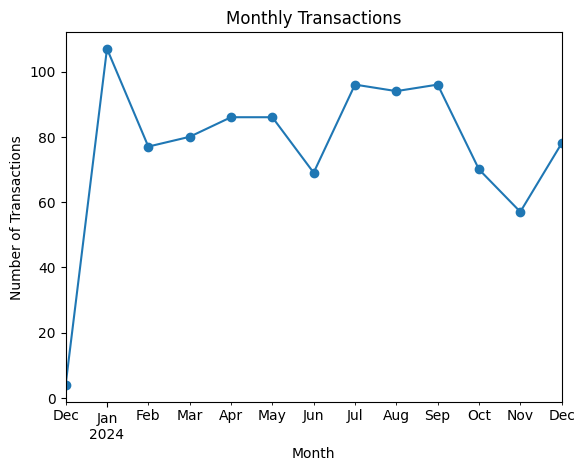

In [12]:
# Convert TransactionDate to datetime
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

# Group by month to analyze trends in transactions
monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M')).size()
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()


In [13]:
product_sales = merged_data.groupby('ProductName')['Quantity'].sum()
product_sales = product_sales.sort_values(ascending=False)
print(product_sales)


ProductName
ActiveWear Smartwatch       100
SoundWave Headphones         97
HomeSense Desk Lamp          81
ActiveWear Rug               79
SoundWave Cookbook           78
                           ... 
HomeSense Headphones         18
SoundWave Laptop             16
SoundWave Jacket             16
BookWorld Wall Art           15
ComfortLiving Headphones     15
Name: Quantity, Length: 66, dtype: int64



Correlation Matrix:
             Price_x  Quantity  TotalValue
Price_x     1.000000 -0.009378    0.722714
Quantity   -0.009378  1.000000    0.609972
TotalValue  0.722714  0.609972    1.000000


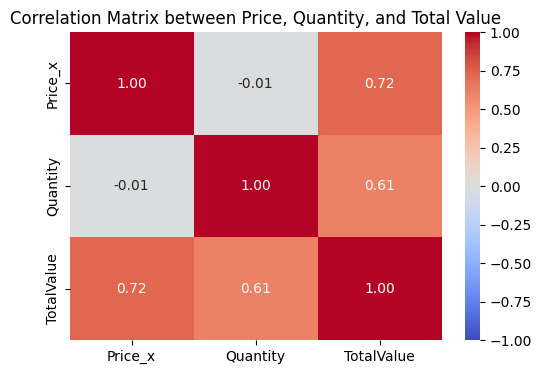

In [14]:
# Correlation between numerical variables
correlation_matrix = merged_data[['Price_x', 'Quantity', 'TotalValue']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plotting the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix between Price, Quantity, and Total Value')
plt.show()


In [15]:
# Group by region to see transaction count and total value per region
region_sales = merged_data.groupby('Region').agg({'Quantity': 'sum', 'TotalValue': 'sum'})

# Display region sales data
print("\nRegion-wise Sales:")
print(region_sales)



Region-wise Sales:
               Quantity  TotalValue
Region                             
Asia                560   152074.97
Europe              595   166254.63
North America       593   152313.40
South America       789   219352.56


In [16]:
# Count the number of products in each category
category_counts = Products['Category'].value_counts()

# Display the distribution of product categories
print("Product Category Distribution:")
print(category_counts)


Product Category Distribution:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


In [18]:
# Calculate the average price for each product category
average_price_per_category = Products.groupby('Category')['Price'].mean()

# Display the average price per category
print("\nAverage Price per Product Category:")
print(average_price_per_category)



Average Price per Product Category:
Category
Books          292.212308
Clothing       263.720000
Electronics    275.353462
Home Decor     235.020000
Name: Price, dtype: float64


In [19]:
# Merge Transactions with Products to link product categories to transactions
merged_data = Transactions.merge(Products, on='ProductID', how='left')

# Group by Category and calculate total quantity sold for each category
category_sales = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

# Display total quantity sold per category
print("\nTotal Quantity Sold per Product Category:")
print(category_sales)



Total Quantity Sold per Product Category:
Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


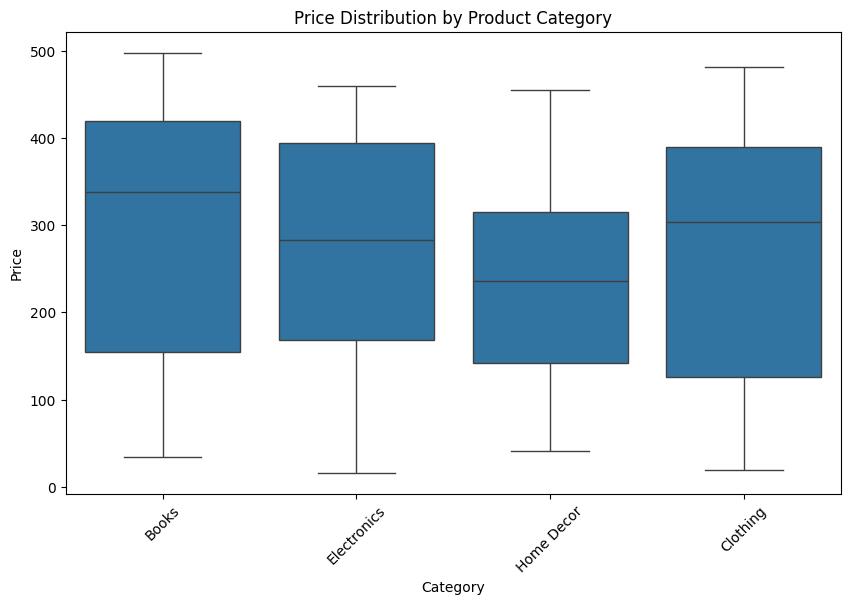

In [20]:
# Plot the price distribution by product category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Price', data=Products)
plt.title('Price Distribution by Product Category')
plt.xticks(rotation=45)
plt.show()

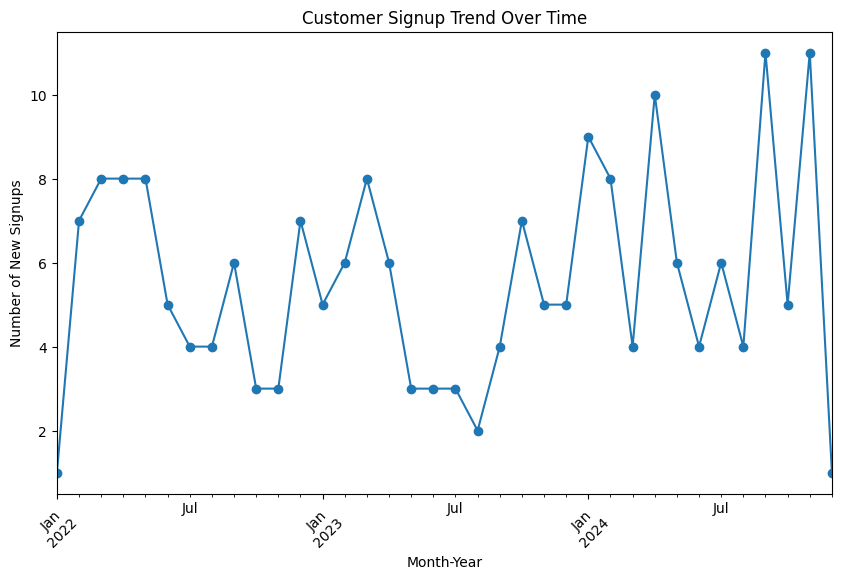

In [21]:
# Convert SignupDate to datetime format
Customers['SignupDate'] = pd.to_datetime(Customers['SignupDate'])

# Extract Month-Year from SignupDate for trend analysis
Customers['SignupMonthYear'] = Customers['SignupDate'].dt.to_period('M')

# Group by Month-Year and count the number of new signups
signup_trend = Customers.groupby('SignupMonthYear').size()

# Plot the trend in customer signups over time
plt.figure(figsize=(10, 6))
signup_trend.plot(kind='line', marker='o')
plt.title('Customer Signup Trend Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of New Signups')
plt.xticks(rotation=45)
plt.show()


In [22]:
# Merge Transactions with Customers to get region data
merged_data = Transactions.merge(Customers, on='CustomerID', how='left')

# Merge the result with Products dataframe to get product details
merged_data = merged_data.merge(Products, on='ProductID', how='left')

# Group by Region and ProductName, and calculate total quantity sold
region_product_sales = merged_data.groupby(['Region', 'ProductName'])['Quantity'].sum().reset_index()

# Find the top product for each region by getting the product with the highest quantity
top_product_per_region = region_product_sales.loc[region_product_sales.groupby('Region')['Quantity'].idxmax()]

# Display the top product per region
print("Top Product per Region:")
print(top_product_per_region[['Region', 'ProductName', 'Quantity']])


Top Product per Region:
            Region            ProductName  Quantity
39            Asia      HomeSense T-Shirt        28
67          Europe         ActiveWear Rug        30
170  North America   SoundWave Headphones        37
196  South America  ActiveWear Smartwatch        38


In [23]:
# Merge the Transactions with Products to get the price for each product
merged_transactions = Transactions.merge(Products[['ProductID', 'Price']], on='ProductID', how='left')

# Calculate the total value (TotalPrice) for each transaction (Quantity * Price)
merged_transactions['TotalValue'] = merged_transactions['Quantity'] * merged_transactions['Price_x']

# Group by CustomerID to calculate total quantity, total price, and the number of transactions
customer_metrics = merged_transactions.groupby('CustomerID').agg(
    TotalQuantity=('Quantity', 'sum'),
    TotalPrice=('TotalValue', 'sum'),
    NumTransactions=('TransactionID', 'nunique')
).reset_index()

# Display the result
print("Customer Metrics (Total Quantity, Total Price, Number of Transactions):")
print(customer_metrics)

Customer Metrics (Total Quantity, Total Price, Number of Transactions):
    CustomerID  TotalQuantity  TotalPrice  NumTransactions
0        C0001             12     3354.52                5
1        C0002             10     1862.74                4
2        C0003             14     2725.38                4
3        C0004             23     5354.88                8
4        C0005              7     2034.24                3
..         ...            ...         ...              ...
194      C0196             12     4982.88                4
195      C0197              9     1928.65                3
196      C0198              3      931.83                2
197      C0199              9     1979.28                4
198      C0200             16     4758.60                5

[199 rows x 4 columns]
